In [1]:
%%html
<style>
::marker {
    unicode-bidi: isolate;
    font-variant-numeric: tabular-nums;
    text-transform: none;
    text-indent: 0px !important;
    text-align: start !important;
    text-align-last: start !important;
}
</style>

# <span style="color:#3b07b4;font-weight:bold">Assessment Report</span>

**Table of Contents**

1. [Basic Information](#Basic-Information)
1. [Technical Reports](#Technical-Reports)
    1. [DatasetFairness - Dataset: UCI-credit-default Report](#DatasetFairness---Dataset:-UCI-credit-default-Report)
        1. [DatasetFairness - Dataset: UCI-credit-default Results](#DatasetFairness---Dataset:-UCI-credit-default-Results)
        1. [DatasetFairness - Dataset: UCI-credit-default Result Tables](#DatasetFairness---Dataset:-UCI-credit-default-Result-Tables)
    1. [Fairness - Dataset: UCI-credit-default Report](#Fairness---Dataset:-UCI-credit-default-Report)
        1. [Fairness - Dataset: UCI-credit-default Results](#Fairness---Dataset:-UCI-credit-default-Results)
        1. [Fairness - Dataset: UCI-credit-default Result Tables](#Fairness---Dataset:-UCI-credit-default-Result-Tables)
* Creation time: 2022-04-04 15:37

In [2]:
from IPython.display import HTML

HTML('''
<script>
window.addEventListener('load', function() {
    let message = { height: document.body.scrollHeight, width: document.body.scrollWidth };     
    window.top.postMessage(message, "*");
});
</script>

<script>
$('div.input').hide();
</script>
''')

# <span style="color:#3b07b4">Technical Reports</span>

In [1]:
%%html
<style>
::marker {
    unicode-bidi: isolate;
    font-variant-numeric: tabular-nums;
    text-transform: none;
    text-indent: 0px !important;
    text-align: start !important;
    text-align-last: start !important;
}
</style>

In [2]:
import cloudpickle
reporter = cloudpickle.load(open('reporter.pkl','rb'))
%config InlineBackend.figure_formats = ['svg', 'png']

<hr style="border:2px solid #3b07b4"> </hr>

## DatasetFairness - Dataset: UCI-credit-default Report

#### Description

Dataset Assessment

   
Runs fairness assessment on a CredoDataset. This
includes:

* Distributional assessment of dataset
* Proxy detection
* Demographic Parity of outcomes

Note: this assessment runs on the the scrubbed data (see CredoData.get_scrubbed_data).

Modules:

* credoai.modules.dataset_fairness


### DatasetFairness - Dataset: UCI-credit-default Results

#### Data Balance

<details>
<summary>Assessment Description:</summary>
<br>
<p>The data balance assessment helps us gain insights
into how different subgroups are represented in the 
dataset. Data balance is particularly important for
datasets used to train models, as models generally show some
form of <a href="https://medium.com/@mrtz/how-big-data-is-unfair-9aa544d739de">bias towards the most represented group</a>. 
</p>

<p>For validation datasets
it is important that each important subgroup is 
adequately represented, but parity is not necessarily required.
However, if subgroups <em>are</em> imbalanced, it is imperative
that performance measures are disaggregated across subgroups.</p>
</details><br>

<details>
<summary>Plot Descriptions:</summary>
<br>
<p>The first plot shows the number of samples for each
subgroup in the dataset.</p>

<p>The second plot shows how the outcome distribution differs
between subgroups.</p>

<p>The third plot summarizes label disparities by calculating
the <a href="https://afraenkel.github.io/fairness-book/content/05-parity-measures.html#demographic-parity">demographic parity]</a>. This metric compares the proportion 
of samples a group is given a particular label to other groups.
Ideally, this value is 1. We calculate this value for each outcome label.
Typically, one is concerned with the demographic parity of outcomes that are either:</p>

<ul>
    <li>beneficial vs. the status quo</li>
    <li>harmful vs. the status quo</li>
    <li>rarer</li>
</ul>

<p>That is to say, your AI system probably <em>does something</em> to people. This
plot helps you evaluate whether it is equitable in its actions.</p>
</details>

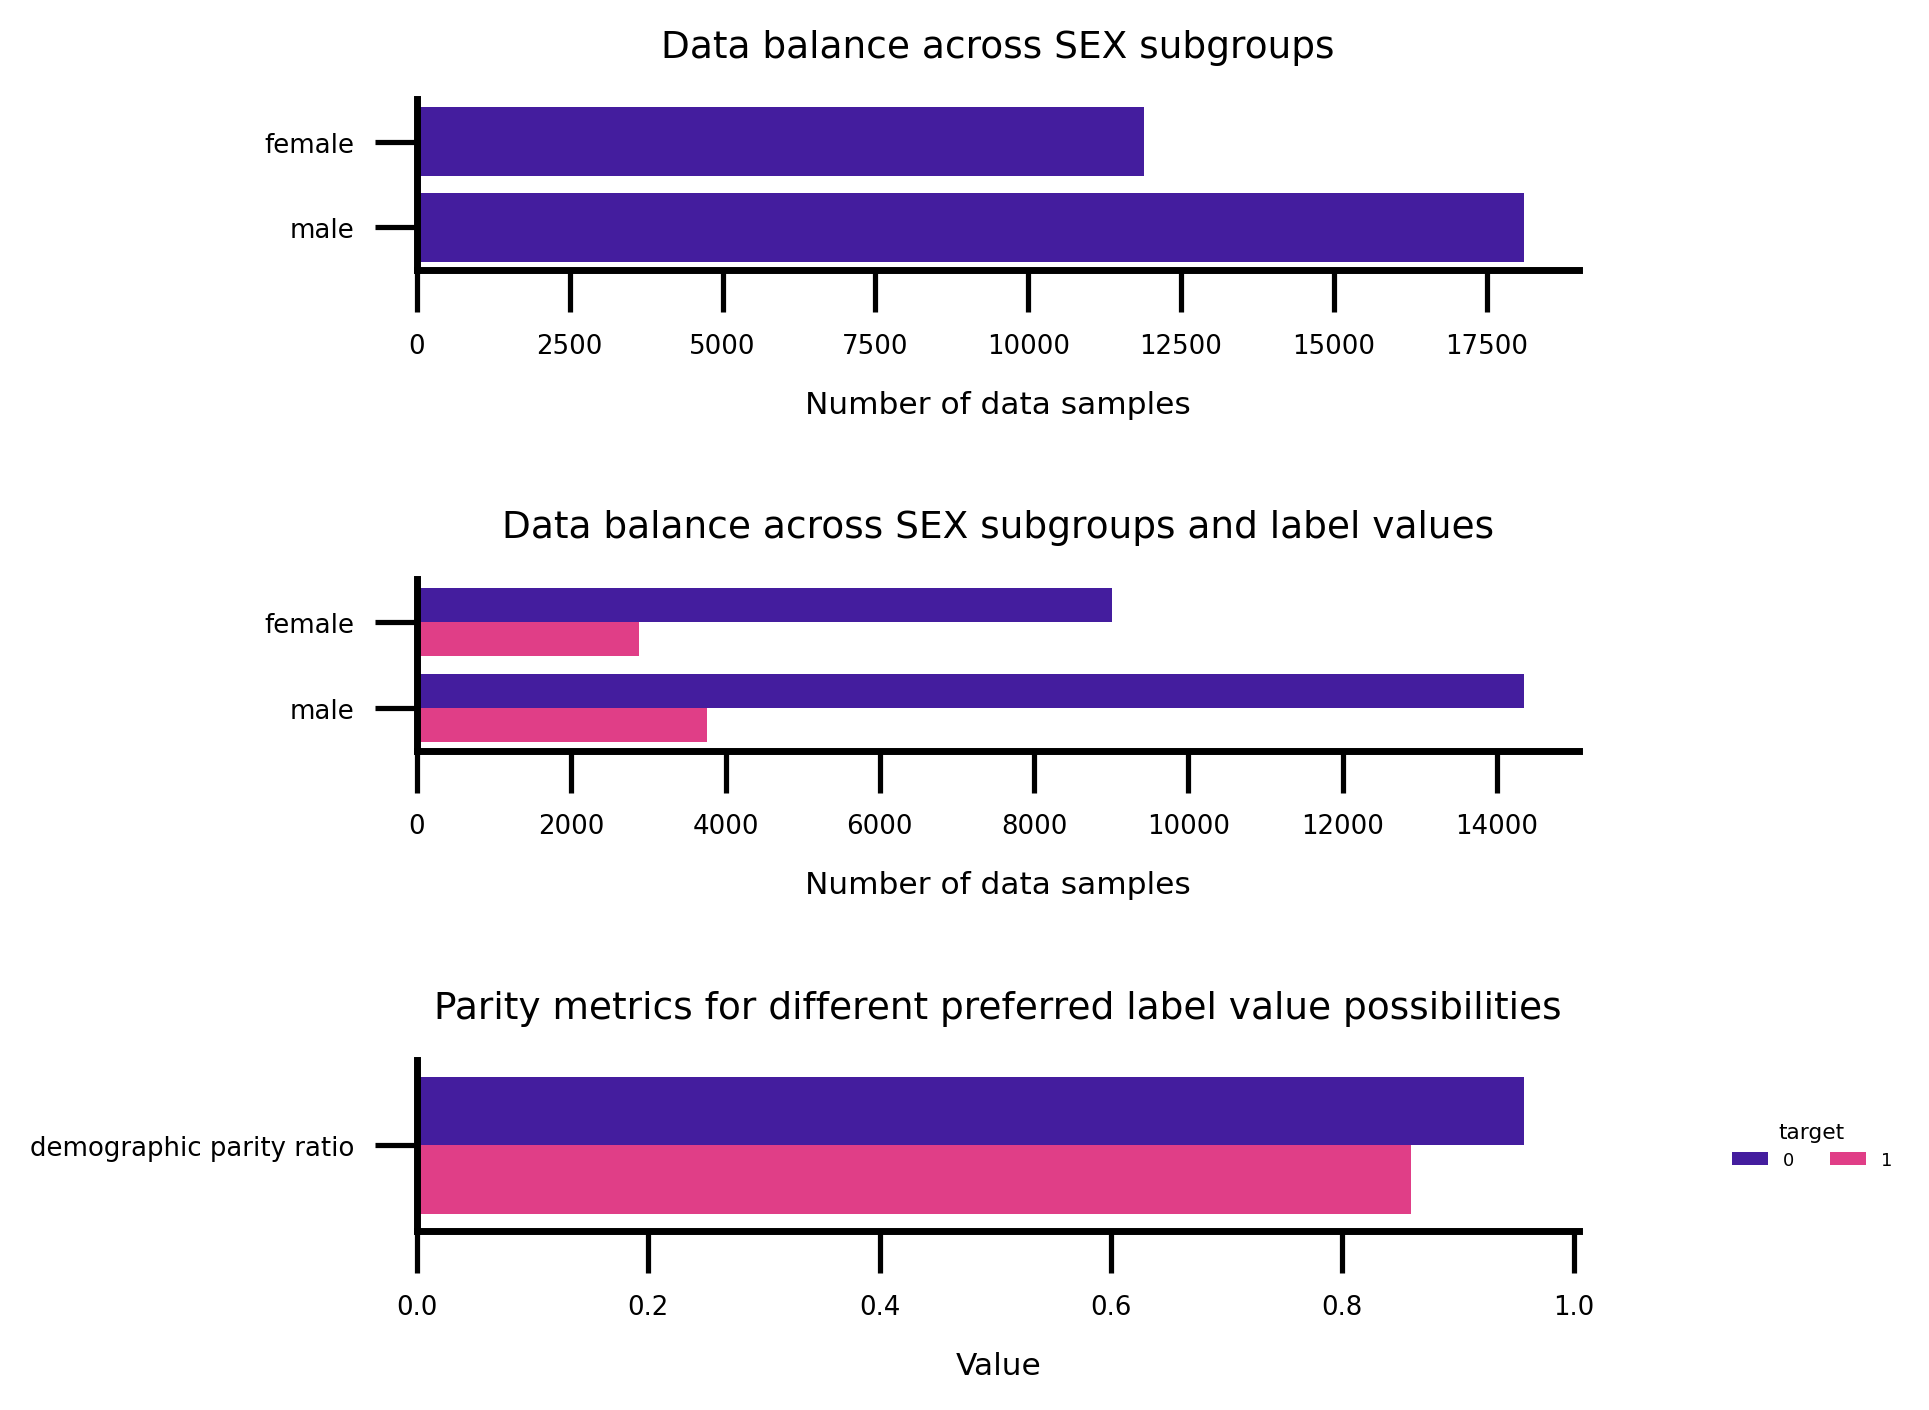

In [3]:
reporter._plot_balance_metrics();

#### Redundant Encoding

<details open>
<summary>Assessment Description:</summary>
<br>
<p>The most important thing to check about your dataset is
"does it redundantly code a sensitive feature". Redundant encoding
means that the sensitive feature can be <em>reconstructed</em> from the features 
in your dataset. If it can be reconstructed, this means that your AI system
is implicitly trained on the sensitive feature, <em>even if it isn't explicitly included
in the dataset</em>.</p>

<p>To evaluate this, we train a model that tries to predict the sensitive feature from the
dataset. The score ranges from 0.5 - 1.0. If the score is 0.5, the model is random, and
no information about the senstive feature is likely contained in the dataset. A value
of 1 means the sensitive feature is able to be perfectly reconstructed.</p>

<p>The <a href="#Feature-Balance>Feature Balance</a> and <a href="#Feature-Proxy-Detection>Feature Proxy Detection</a>
sections each provide additional perspective by diving into whether
individual features serve as proxies. Note that the overall dataset can be a 
proxy even if no individual feature is! That's where this score is important.</p>

</details>

**Overall Proxy Score**: 0.6224

#### Feature Balance

<details>
<summary>Assessment Description:</summary>
<br>

<pr>Though potentially less important than balance of the
primary outcome, feature differences are also worth evaluating.</pr>

<pr>While some differences amongst groups should be expected, large deviations
are problematic. One of the main issues is that they may lead
to your dataset <em>redundantly encoding</em> sensitive features. In other
words, features that differ significantly between groups act as proxies
for the sensitive feature.</pr>
</details>

In [4]:
reporter._plot_group_diff();

#### Feature Proxy Detection

<details open>
<summary>Assessment Description:</summary>
<br>
Feature Balance serves as a simple descriptive analysis
of sensitive feature parity. A more rigorous method is to calculate
the <a href="https://simple.wikipedia.org/wiki/Mutual_information">mutual information</a> between
the features and the sensitive feature.

</details><br>

<details>
<summary>Plot Description:</summary>
<br>
<p>Higher values mean there is more information about the sensitive feature
encoded in the feature. We normalize the mutual information by the amount of information
the sensitive feature has <em>to itself</em>. Thus this metric goes from 0-1, where 1 means 
the feature is a perfect proxy of the sensitive feature.</p>

<p>Removing such features is advised!</p>
</details>

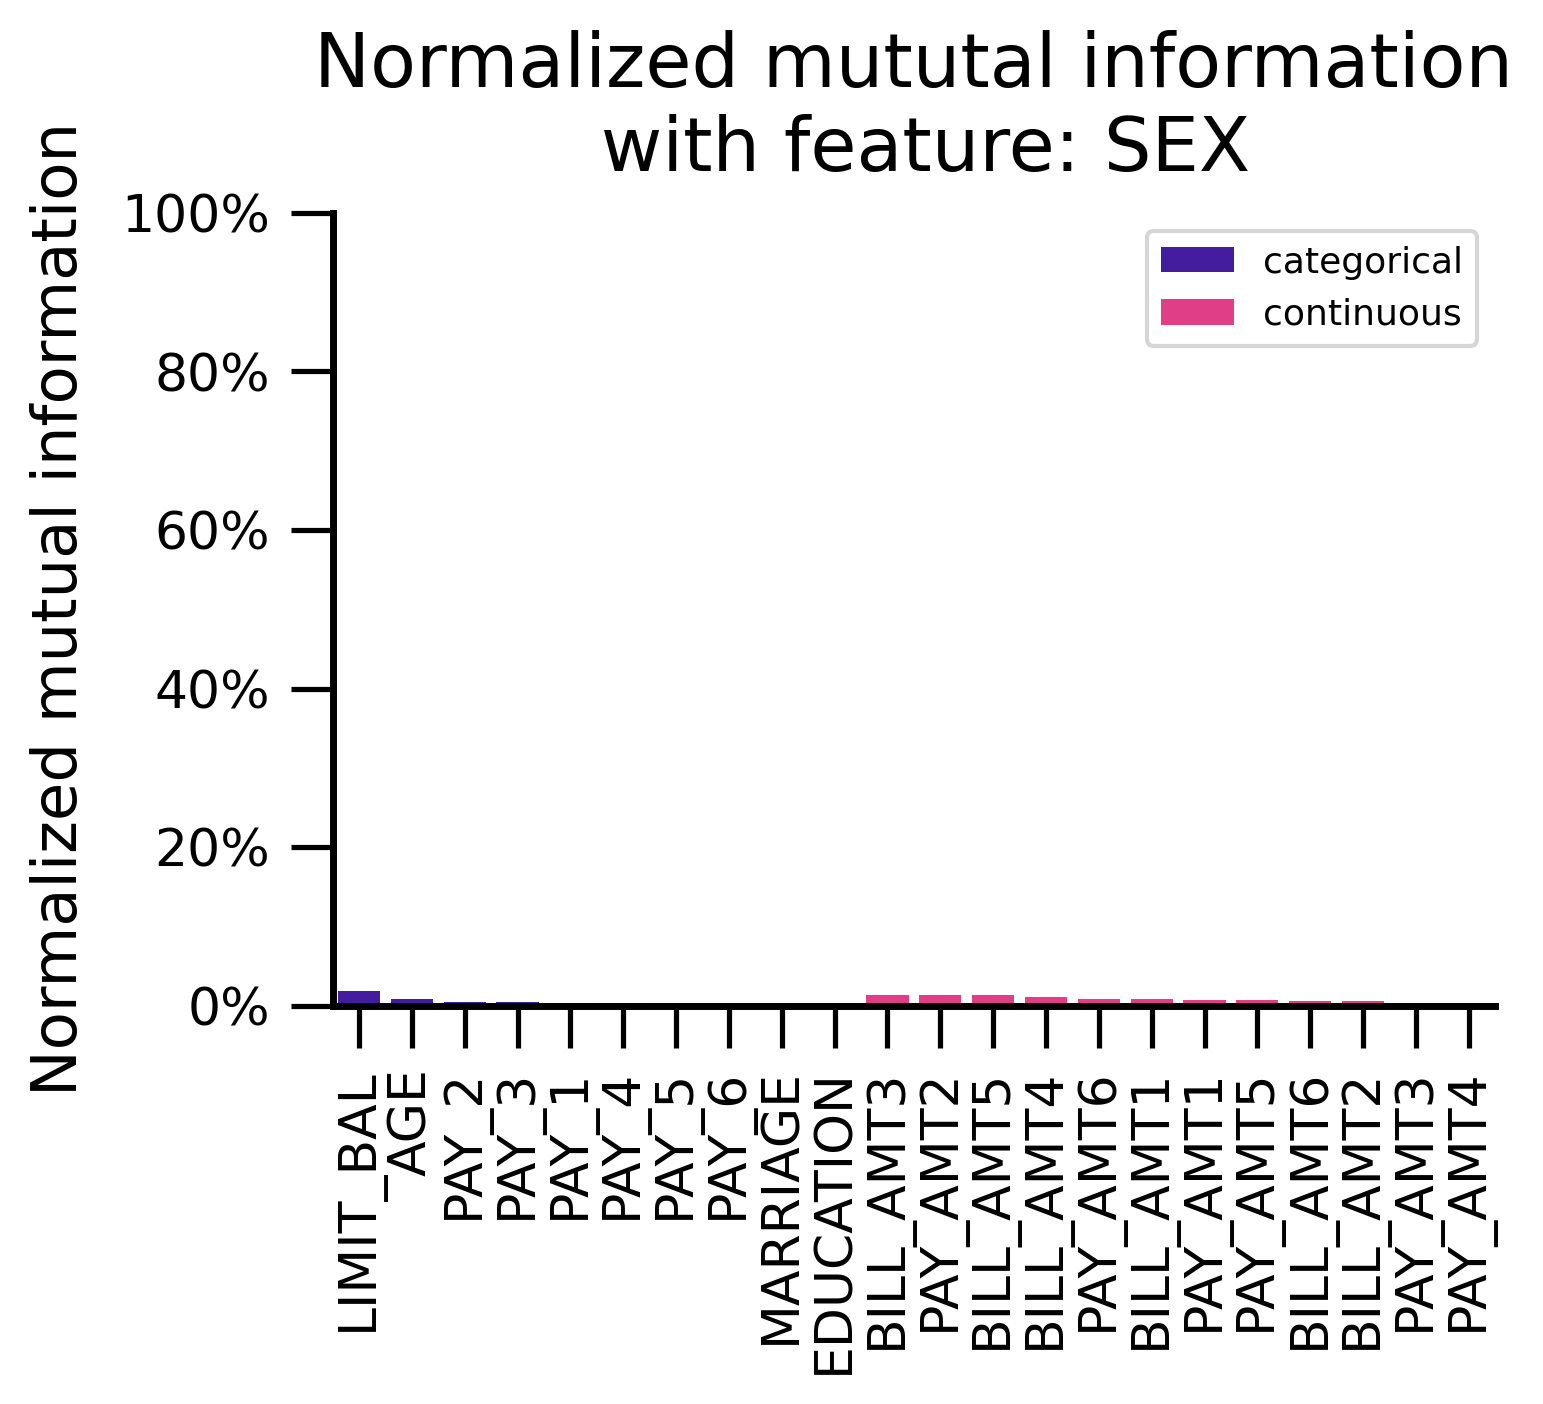

In [5]:
reporter._plot_mutual_information();

### DatasetFairness Result Tables

In [6]:
reporter.display_results_tables()

,SEX,count,percentage
0,female,11888,39.626667
1,male,18112,60.373333


,SEX,target,count
0,female,0,9015
1,female,1,2873
2,male,0,14349
3,male,1,3763


,target,value
0,0,0.033909
1,1,0.033909


,target,value
0,0,0.957198
1,1,0.859688


,0
0,0.62242


,0
LIMIT_BAL_20000.0,0.034216
LIMIT_BAL_50000.0,0.024048
AGE_23.0,0.023134
LIMIT_BAL_10000.0,0.022494
AGE_24.0,0.019842
...,...
PAY_2_7.0,0.000000
PAY_2_6.0,0.000000
PAY_2_5.0,0.000000
LIMIT_BAL_650000.0,0.000000


,female-male
AGE,0.185787
BILL_AMT1,0.068779
BILL_AMT2,0.063753
BILL_AMT3,0.050218
BILL_AMT4,0.044732
BILL_AMT5,0.034766
BILL_AMT6,0.034210
LIMIT_BAL,-0.050611
PAY_AMT1,0.000496
PAY_AMT2,0.002844


,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
value,0.008477,0.008768,0.005628,0.013951,0.011488,0.013004,0.005749,0.000765,0.018472,0.000826,...,0.00407,0.003323,0.002629,0.001832,0.007724,0.013046,0.001745,0.000672,0.00744,0.008915
feature_type,categorical,continuous,continuous,continuous,continuous,continuous,continuous,categorical,categorical,categorical,...,categorical,categorical,categorical,categorical,continuous,continuous,continuous,continuous,continuous,continuous


In [1]:
%%html
<style>
::marker {
    unicode-bidi: isolate;
    font-variant-numeric: tabular-nums;
    text-transform: none;
    text-indent: 0px !important;
    text-align: start !important;
    text-align-last: start !important;
}
</style>

In [2]:
import cloudpickle
reporter = cloudpickle.load(open('reporter.pkl','rb'))
%config InlineBackend.figure_formats = ['svg', 'png']

<hr style="border:2px solid #3b07b4"> </hr>

## Fairness - Dataset: UCI-credit-default Report

#### Description

Basic evaluation of the fairness of ML models

   
Runs fairness analysis on models with well-defined
objective functions. Examples include:

* binary classification
* regression
* recommendation systems

Modules:

* credoai.modules.fairness_base


### Fairness - Dataset: UCI-credit-default Results

#### Fairness Metrics

<details>
<summary>Assessment Description:</summary>
<br>
<p>The fairness assessment is divided into two primary metrics: (1) Fairness
    metrics, and (2) performance metrics. The former help describe how equitable
    your AI system, while the latter describes how performant the system is.</p.
    
<p>Fairness metrics summarize whether your AI system is performing similarlty across all groups.
    These metrics may well-known "fairness metrics" like "equal opportunity", 
    or performance parity metrics. Performance parity captures the idea that the
    AI system should work similarly well for all groups. Some "fairness metrics"
    like equal opportunity are actually parity metrics. "Equal opportunity" is simply
    the true positive rate parity.
</p>

<p>Performance metrics describe how performant your system is. It goes without saying
    that the AI system should be performing at some minimum acceptable level to be
    deployed. The Fairness Assessment disaggregates performance across the 
    sensitive feature provided. This ensures that the system is evaluated for 
    acceptable performance across groups that are important. Think of it as any
    segmentation analysis, where the segments are groups of people.</p>
</details>

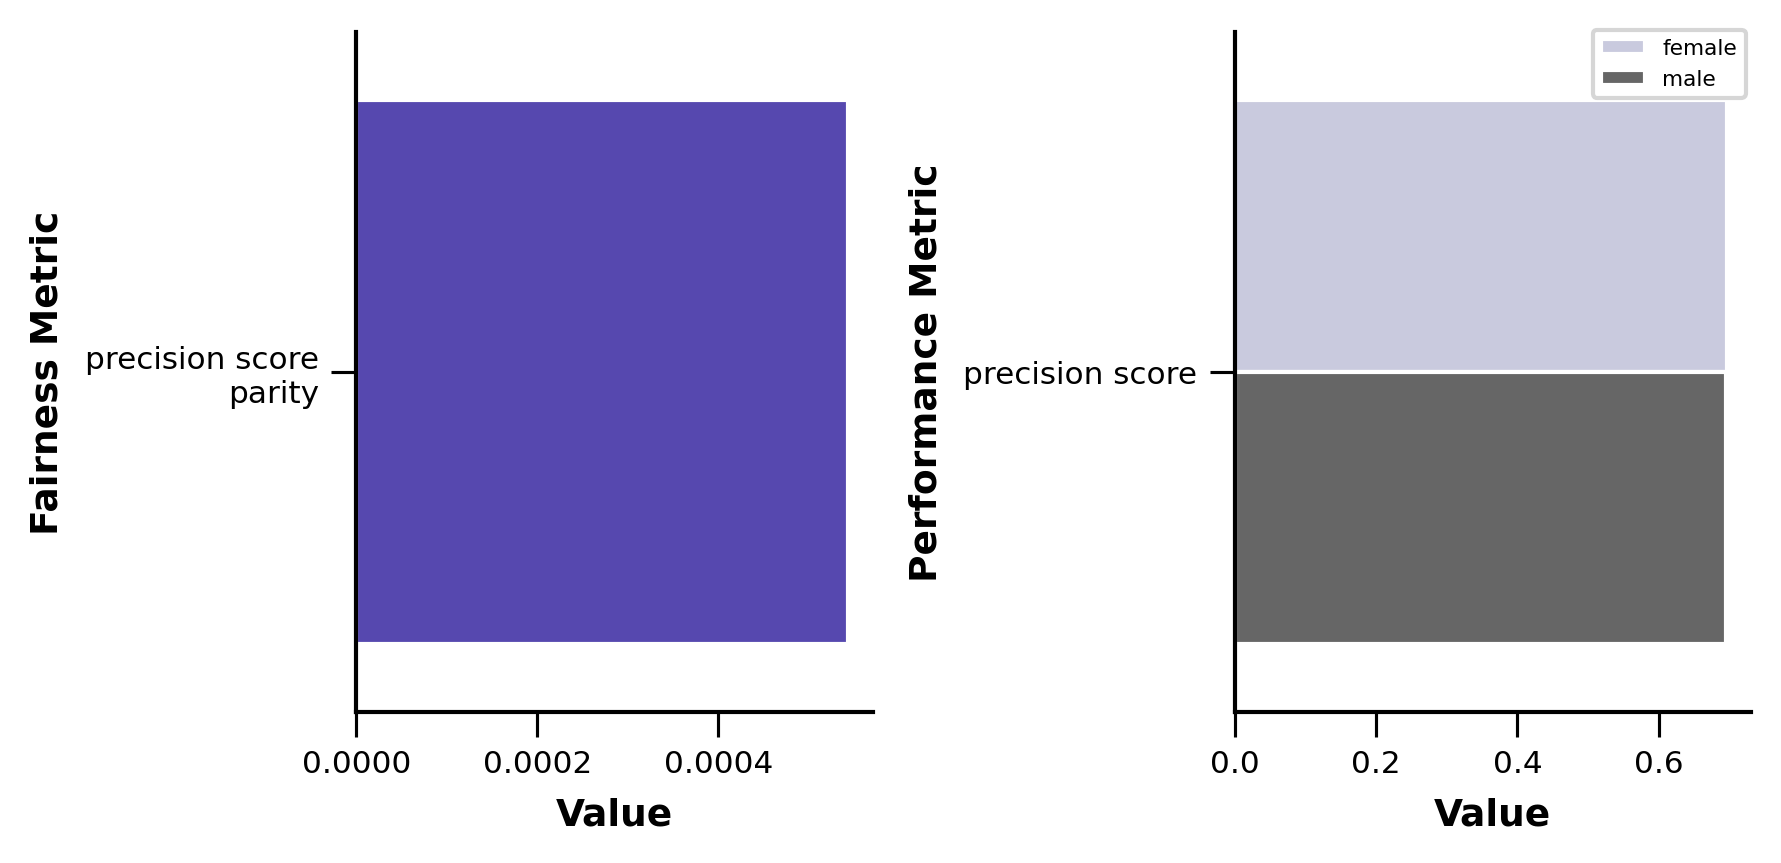

In [3]:
reporter.plot_fairness();

#### Binary Classification Infographic

<details>
<summary>Plot Descriptions:</summary>
<br>
<u>Positive Rate Infographic</u>
<p>On the left is a visual summary of the AI system's performance on different
    subgroups. These plots track the ground truth and predicted positive rate.
    Note that the "positive rate" is a function of the dataset's labeling and doesn't
    necessarily mean a positive outcome! For instance, "denying bail" could be the positive
    label.</p>

<p>Ideally the AI system performs equally well for all subgroups and positively 
    classifies each group at similar rates</p>

<p> ** Note ** If the ground truth positive rate differs between groups, the AI system cannot
    be <a href="https://arxiv.org/abs/1609.07236">fair by all definition of fairness.</a>
    For instance, the AI system can either accurately reflect the outcome differences
    in the data (violating demographic parity if the dataset show disparities) or 
    violating performance parity.
</p><br>

<u> Confusion Matrixes</u>
<p>On the right are <a href="https://towardsdatascience.com/confusion-matrix-what-is-it-e859e1bbecdc">confusion matrixes</a> 
    for each group. The confusion matrix plots true positive, false positive, true negative and false negative rates.
    It is rich description of the performance of binary classification systems. A well performing system should have
    most outcomes along the diagonal (true positives and true negatives).</p>
    
<p>** Note ** A perfect looking confusion matrix for every group does not guarantee
    fairness by all definitions! It just means that the model is accurately reflecting
    the dataset. If the dataset has different positive outcome rates
    for different groups, the model may be considered unfair.
</details>

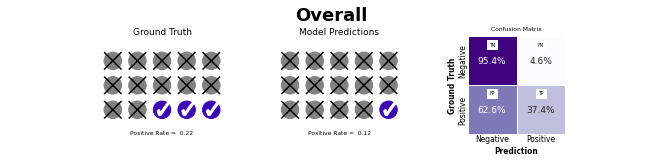

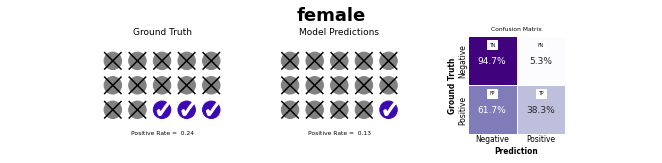

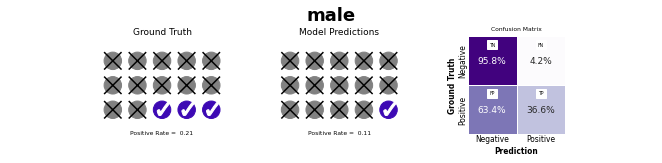

In [4]:
df = reporter.module.get_df()
if df['true'].dtype.name == 'category':
    df['true'] = df['true'].cat.codes
reporter.plot_performance_infographic(df['true'], df['pred'], 'Overall')
for group, sub_df in df.groupby('sensitive'):
    reporter.plot_performance_infographic(sub_df['true'], sub_df['pred'], group)

### Fairness Result Tables

In [5]:
reporter.display_results_tables()

,precision_score,subtype
SEX,,
female,0.695954,disaggregated_performance
male,0.695411,disaggregated_performance


,value,subtype
metric_type,,
precision_score,0.000543,parity
